In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

In [2]:
X_train = np.load('data/data.npy')

In [3]:
X_train.shape

(200, 2)

In [4]:
X_train[:5]

array([[2.61755903, 2.49389168],
       [1.7395701 , 3.10180942],
       [3.31414238, 3.10472391],
       [1.24430187, 1.93071636],
       [3.17727043, 3.66255088]])

In [5]:
X_train.size

400

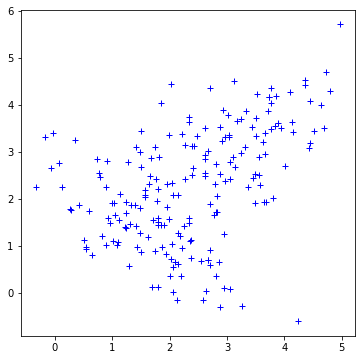

In [6]:
plt.figure(figsize=(6,6))
plt.plot(X_train[:, 0], X_train[:, 1], 'b+')
plt.show()

In [7]:
#Quan sát trên biểu đồ trực quan thì nhận thấy dữ liệu không có phân cụm rõ ràng
# Không dùng KMeans => Dùng GMM để thực hiện phân cụm

In [8]:
# xác định giá trị K (K components)
#https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
from sklearn.metrics import silhouette_score

In [9]:
list_sil = [] # lưu danh sách các giá trị silhouette theo k
K = range(2, 9) # chứa danh sách các giá trị k cần xét: 2, 3, 4, 5, 6, 7, 8
for k in K:
    gmm = GaussianMixture(n_components = k)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    # k = 2 => 0, 1; k = 3 => 0, 1, 2
    sil = silhouette_score(X_train, labels, metric='euclidean')
    list_sil.append(sil)

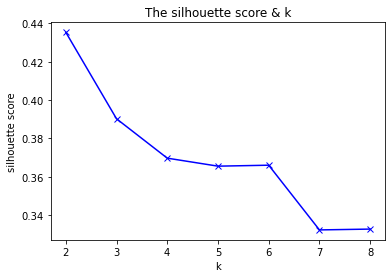

In [10]:
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('The silhouette score & k')
plt.show()

In [11]:
# chọn k=2 có silhouette cao nhất
model_gmm = GaussianMixture(n_components = 2)
model_gmm.fit(X_train)

GaussianMixture(n_components=2)

In [12]:
labels = model_gmm.predict(X_train)
labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

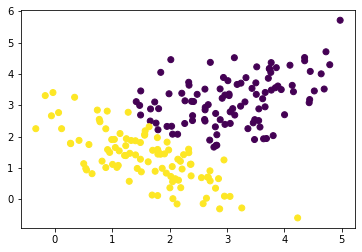

In [13]:
# trực quan hóa kết quả
plt.scatter(X_train[:, 0],X_train[:, 1], c=labels)
plt.show()

In [14]:
# Sau khi model đã hội tụ cần tìm means, covariates và Weights (Density)
Dens = model_gmm.weights_
means = model_gmm.means_
cov = model_gmm.covariances_

In [15]:
print('Density:')
print(Dens)

Density:
[0.52279335 0.47720665]


In [16]:
print('means:')
print(means)

means:
[[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]


In [17]:
print('Covariances:')
print(cov)

Covariances:
[[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


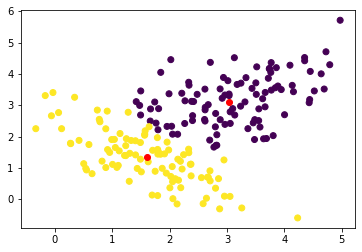

In [18]:
# trực quan hóa kết quả
plt.scatter(X_train[:, 0],X_train[:, 1], c=labels)
plt.scatter(means[:, 0],means[:, 1], color='red')
plt.show()

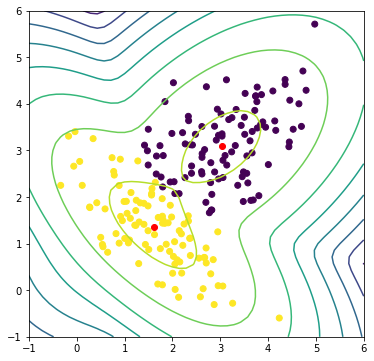

In [19]:
plt.figure(figsize=(6,6))
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1, 6))
XX = np.array([X.ravel(), Y.ravel()]).T # ma trận [[x,y]]
Z = model_gmm.score_samples(XX)
Z = Z.reshape((50, 50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0],X_train[:, 1], c=labels)
plt.scatter(means[:, 0],means[:, 1], color='red')
plt.show()

In [20]:
means[:, 0]

array([3.0363831 , 1.60629419])